In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

random.seed(0)

#### Functions

In [16]:
def get_reward1():
    """
    Function to return a reward for lever 1 based on a normal distribution
    """
    return random.gauss(6, 15)

def get_reward2():
    """
    Function to return a reward for lever 2 based on a mixed normal distribution
    """
    flag = random.randint(0, 1)
    gauss1 = random.gauss(11, 16)
    gauss2 = random.gauss(3, 8)

    if flag == 0:
        return gauss1 

    return gauss2


def e_greedy_policy(Q: list, e: float):
    """
    Function to return the action based on the e and Q values
    """
    flag = random.uniform(0, 1)
    if flag > e:
        return np.argmax(Q)

    return Q.index(random.choice(Q))


def init_alpha(alpha: str, k: int):
    """
    Function to initialize the alpha value
    """
    if alpha == "a":
        return 1
    elif alpha == "b":
        return pow(0.9, k)
    elif alpha == "c":
        return 1 / (1 + np.log(1 + k))
    elif alpha == "d":
        return 1 / k

def init_alpha_str(alpha: str):
    """
    Function to initialize the alpha string to be shown in the graph title
    """
    if alpha == "a":
        return "1"
    elif alpha == "b":
        return "0.9^k"
    elif alpha == "c":
        return "1/(1 + ln(1 + k))"
    elif alpha == "d":
        return "1/k"

def update_Q(Q: list, action: int, reward: float, alpha, k: int):
    """
    Function to update the Q values based on the reward and action
    """
    if isinstance(alpha, str):
        alpha = init_alpha(alpha, k)
    Q[action] = Q[action] + alpha * (reward - Q[action])

    return Q

def run(Q: list, e: float, alpha: float, steps: int):
    """
    Function to run the simulation "steps" number of times to get the accumulated rewards
    """

    rewards = [0]
    acc_rewards = [0]
    Q_values = [Q]
    curr_Q_value = Q.copy()

    # Running for 1000 times
    for k in range(1, steps + 1):
        # Take action based on policy for the current Q values
        action = e_greedy_policy(curr_Q_value, e)

        # Get reward based on the action
        if action == 0:
            reward = get_reward1()
        else:
            reward = get_reward2()

        # Update Q values based on the reward
        curr_Q_value = update_Q(curr_Q_value, action, reward, alpha, k)

        # Store values
        rewards.append(reward)
        acc_rewards.append(np.average(rewards))
        Q_values.append(list(curr_Q_value))

    return acc_rewards, curr_Q_value


def run_iteratively_epsilon_greedy(
    Q: list, e: float, alpha: float, steps: int, iterations: int
):
    """
    Function to run the simulation iteratively for "iteration" no of times to get the average accumulated rewards
    """
    acc_rewards_per_run = {}
    Q_final_per_run = {}
    avg_acc_reward_per_step = []

    # Running for 100 times to get the accumulated rewards and Q values for each run
    for iteration in range(iterations):
        acc_rewards, Q_value = run(Q, e, alpha, steps)
        acc_rewards_per_run[iteration] = acc_rewards
        Q_final_per_run[iteration] = list(Q_value)

    # Running for 1000 times to get the average accumulated rewards for each step
    for step in range(steps):
        acc_reward_per_step = []
        for iteration in range(iterations):
            acc_reward_per_step.append(acc_rewards_per_run[iteration][step])
        avg_acc_reward_per_step.append(np.average(acc_reward_per_step))

    # Getting final average Q values
    Q1_final_values = [v[0] for v in Q_final_per_run.values()]
    Q2_final_values = [v[1] for v in Q_final_per_run.values()]
    Q_final = [np.average(Q1_final_values), np.average(Q2_final_values)]

    return avg_acc_reward_per_step, Q_final


def plot(Q: list, epsilons: list, alpha, steps: int, iterations: int):
    for e in epsilons:
        avg_acc_reward_per_step, Q_final = run_iteratively_epsilon_greedy(
            Q, e, alpha, steps, iterations
        )
        plt.plot(avg_acc_reward_per_step)
        print(f"ε = {e}   Q_final = {Q_final}")

    if isinstance(alpha, str):
        alpha = init_alpha_str(alpha)

    plt.title(f"Average Accumulated Rewards vs Steps (α = {alpha})")
    plt.xlabel("Steps")
    plt.ylabel("Average Accumulated Reward")
    plt.legend(["ε = 0", "ε = 0.1", "ε = 0.2", "ε = 0.5"])
    plt.grid()  


def plot_Q2(QList: list, e: float, alpha, steps: int, iterations: int):
    for Q in QList:
        avg_acc_reward_per_step, Q_final = run_iteratively_epsilon_greedy(
            Q, e, alpha, steps, iterations
        )
        plt.plot(avg_acc_reward_per_step)
        print(f"Q_start = {Q}   Q_final = {Q_final}")

    plt.title(f"Average Accumulated Rewards vs Steps for various Q values(α = {alpha})")
    plt.xlabel("Steps")
    plt.ylabel("Average Accumulated Reward")
    plt.legend(["Q = [0 0]", "Q = [6 7]", "Q = [15 15]"])
    plt.grid()

#### Question 1

ε = 0   Q_final = [-57.59580231551516, 4.230355845027263]
ε = 0.1   Q_final = [-7.6674515046603355, 0.8263849613666325]
ε = 0.2   Q_final = [-6.723679252195512, 2.8831330040664223]
ε = 0.5   Q_final = [-0.5646158819754823, 4.520739812813441]


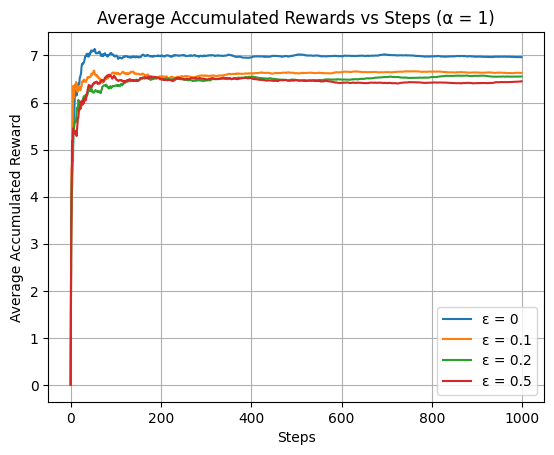

In [88]:
### Alpha = 1
Q = [0, 0]
alpha = 'a'
epsilons = [0, 0.1, 0.2, 0.5]
steps = 1000
iterations = 100

plot(Q, epsilons, alpha, steps, iterations)

ε = 0   Q_final = [-17.907918512018117, 0.0698683233554053]
ε = 0.1   Q_final = [-1.9842347685579462, 3.3805507922696694]
ε = 0.2   Q_final = [0.8300255551759507, 4.268080565598113]
ε = 0.5   Q_final = [3.5193454069764307, 5.389153003746587]


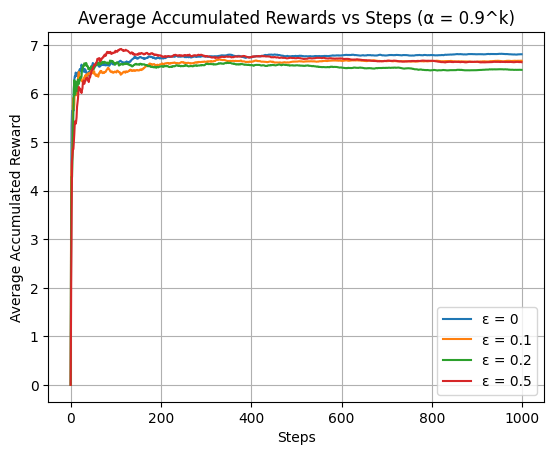

In [89]:
### Alpha = 0.9^k
Q = [0, 0]
alpha = "b"
epsilons = [0, 0.1, 0.2, 0.5]
steps = 1000
iterations = 100

plot(Q, epsilons, alpha, steps, iterations)

ε = 0   Q_final = [-14.016695826785652, 6.848419757433481]
ε = 0.1   Q_final = [2.118703804851767, 5.590452713601521]
ε = 0.2   Q_final = [3.334612531630162, 5.6823053864635895]
ε = 0.5   Q_final = [5.122186058273375, 6.243394619101909]


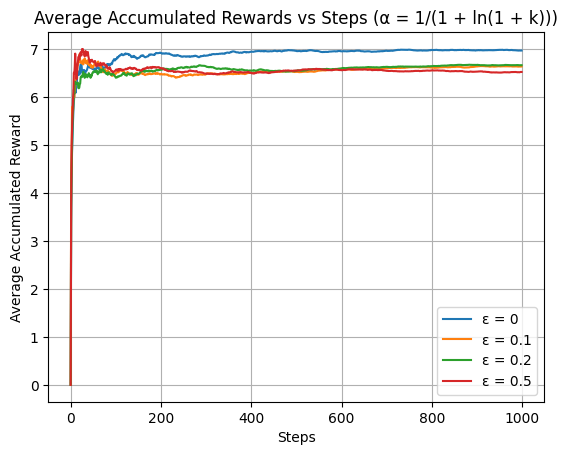

In [94]:
### Alpha = 1/(1 + ln(1 + k))
Q = [0, 0]
alpha = "c"
epsilons = [0, 0.1, 0.2, 0.5]
steps = 1000
iterations = 100

plot(Q, epsilons, alpha, steps, iterations)

ε = 0   Q_final = [-17.15338208306609, 1.7136391621985556]
ε = 0.1   Q_final = [0.47989918781004465, 3.269260775547171]
ε = 0.2   Q_final = [3.378896937913319, 4.795360802694113]
ε = 0.5   Q_final = [5.338087066531322, 5.988485633746575]


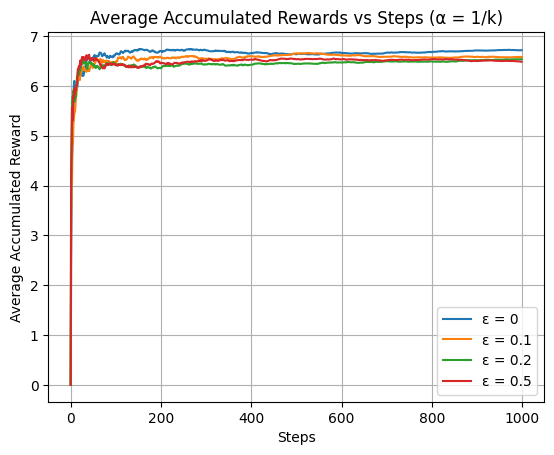

In [91]:
### Alpha = 1/k
Q = [0, 0]
alpha = "d"
epsilons = [0, 0.1, 0.2, 0.5]
steps = 1000
iterations = 100

plot(Q, epsilons, alpha, steps, iterations)

#### Question 2

Q_start = [0, 0]   Q_final = [2.293762495559225, 5.3011406315615455]
Q_start = [6, 7]   Q_final = [3.1457072955823877, 4.992062422992807]
Q_start = [15, 15]   Q_final = [3.994117039652774, 4.766060224600735]


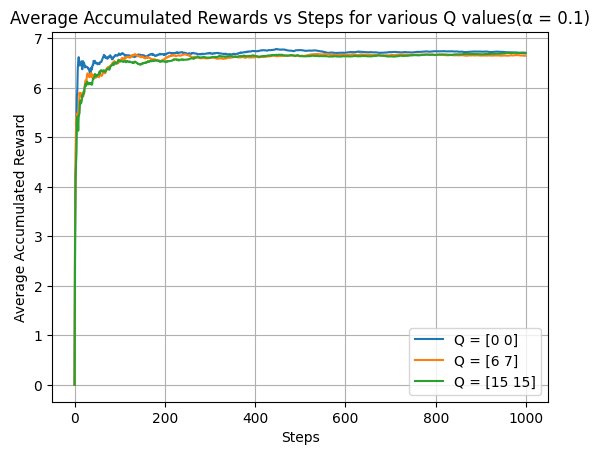

In [7]:
QList = [[0, 0], [6, 7], [15, 15]]
alpha = 0.1
e = 0.1
steps = 1000
iterations = 100

plot_Q2(QList= QList, e= e, alpha= alpha, steps= steps, iterations= iterations)

#### Question 3

In [18]:
def gradient_bandit_policy(H: list):
    """
    Function to return the selected action and probabilites based on the current H values
    """
    probabilities = []
    denominator = sum([math.exp(h) for h in H])
    for h in H:
        probabilities.append(math.exp(h) / denominator)

    selected_action = np.random.choice(list(range(len(H))), p=probabilities)

    return selected_action, probabilities


def update_H(
    H: list, selected_action: int, rewards: list, alpha: float, probabilities: list
):
    """
    Function to update the H values based on the rewards and selected action
    """
    curr_reward = rewards[-1]
    avg_reward = np.average(rewards)

    for action in range(len(H)):
        if action == selected_action:
            H[action] = H[action] + alpha * (curr_reward-avg_reward) * (1 - probabilities[action])
        else:
            H[action] = H[action] - alpha * (curr_reward-avg_reward) * (probabilities[action])

    return H

def run_gradient_bandit(H: list, alpha: float, steps: int):
    """
    Function to run the simulation for the gradient bandit algorithm
    """
    rewards = [0]
    acc_rewards = [0]
    curr_H_values = H.copy()

    # Running for 1000 times
    for step in range(1, steps + 1):
        # Take action based on policy for the current H values
        selected_action, probabilities = gradient_bandit_policy(curr_H_values)

        # Get reward based on the selected action
        if selected_action == 0:
            reward = get_reward1()
        else:
            reward = get_reward2()

        # Store values
        rewards.append(reward)
        acc_rewards.append(np.average(rewards))
        
        # Update H values based on the reward
        curr_H_values = update_H(
            curr_H_values, selected_action, rewards, alpha, probabilities
        )

    return acc_rewards


def run_gradient_bandit_iteratively(H: list, alpha: float, steps: int, iterations: int):
    """
    Function to run the simulation iteratively for "iteration" no of times to get the average accumulated rewards
    """
    acc_rewards_per_run = {}
    avg_acc_reward_per_step = []

    # Running for 100 times to get the accumulated rewards and Q values for each run
    for iteration in range(iterations):
        acc_rewards = run_gradient_bandit(H, alpha, steps)
        acc_rewards_per_run[iteration] = acc_rewards

    # Running for 1000 times to get the average accumulated rewards for each step
    for step in range(steps):
        acc_reward_per_step = []
        for iteration in range(iterations):
            acc_reward_per_step.append(acc_rewards_per_run[iteration][step])
        avg_acc_reward_per_step.append(np.average(acc_reward_per_step))

    return avg_acc_reward_per_step

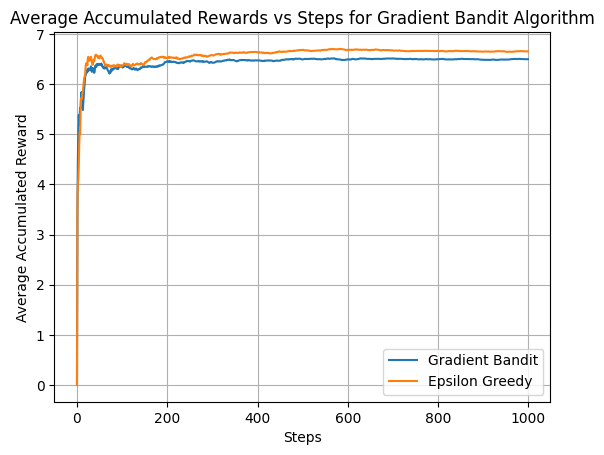

In [21]:
H = [0, 0]
Q = [0, 0]
alpha = 0.1
e = 0.1
steps = 1000
iterations = 100

avg_acc_reward_per_step_gradient_bandit = run_gradient_bandit_iteratively(H, alpha, steps, iterations)
avg_acc_reward_per_step_epsilon_greedy, Q_final = run_iteratively_epsilon_greedy(Q, e, alpha, steps, iterations)

plt.plot(avg_acc_reward_per_step_gradient_bandit)
plt.plot(avg_acc_reward_per_step_epsilon_greedy)

plt.title(f"Average Accumulated Rewards vs Steps for Gradient Bandit Algorithm")
plt.xlabel("Steps")
plt.ylabel("Average Accumulated Reward")
plt.legend(["Gradient Bandit", "Epsilon Greedy"])
plt.grid()